# Data Preprocessing

 Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
rt=pd.read_csv('E:\youtube channel analytics\src\data\youtube_channel_data.csv')

In [38]:
rt.head()

,VideoID,Title,UploadDate,Description,Duration,Views,Likes,Dislikes,Comments,URL
0,EiFcNbXBqeo,Jet Engine vs Human for $10k,2025-07-20 16:00:01+00:00,NaN,PT24S,80982050,1342772,0,4228,https://www.youtube.com/watch?v=EiFcNbXBqeo
1,pzBi1nwDn8U,"Survive 100 Days Trapped In A Private Jet, Kee...",2025-07-19 16:00:01+00:00,Spending that much time in a jet is crazy\n10 ...,PT33M3S,98449664,2840771,0,36898,https://www.youtube.com/watch?v=pzBi1nwDn8U
2,R7oW0LwS_e4,I Met Neymar,2025-07-11 16:15:07+00:00,NaN,PT10S,73051329,1321242,0,13258,https://www.youtube.com/watch?v=R7oW0LwS_e4
3,BfKI_TQnQvo,I Raced A Cheetah,2025-07-06 16:00:01+00:00,NaN,PT20S,94929935,2454893,0,10775,https://www.youtube.com/watch?v=BfKI_TQnQvo
4,FWAdfuPpLOc,World's Fastest Car Vs Cheetah!,2025-07-05 16:00:01+00:00,I still can't believe we got all these animals...,PT20M37S,123002519,2962519,0,41971,https://www.youtube.com/watch?v=FWAdfuPpLOc


In [39]:
rt.shape

(886, 10)

In [40]:
rt.describe()

,Views,Likes,Dislikes,Comments
count,8.860000e+02,8.860000e+02,886.0,886.000000
mean,1.028462e+08,2.867273e+06,0.0,38070.351016
std,1.766513e+08,5.738641e+06,0.0,68435.556462
min,5.836000e+04,0.000000e+00,0.0,0.000000
25%,1.213210e+05,3.481250e+03,0.0,461.250000
50%,3.776174e+06,1.458875e+05,0.0,6662.000000
75%,1.632523e+08,3.521832e+06,0.0,54498.250000
max,1.591316e+09,5.666968e+07,0.0,805587.000000


The channel has a highly viral nature — few videos massively outperform others.

High standard deviation across all metrics (except dislikes) confirms non-uniform performance.

Most videos have decent engagement, but the top 25% dominate in metrics like views, likes, and comments.


In [41]:
rt.isnull().sum()

VideoID         0
Title           0
UploadDate      0
Description    96
Duration        0
Views           0
Likes           0
Dislikes        0
Comments        0
URL             0
dtype: int64

Description column has a lot of missing values. Let’s fill them with a placeholder text.

In [42]:
rt['Description'].fillna('No Description', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16236\2291831228.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rt['Description'].fillna('No Description', inplace=True)


In [43]:
rt.isnull().sum()  # Check again to confirm no null values in 'Description'

VideoID        0
Title          0
UploadDate     0
Description    0
Duration       0
Views          0
Likes          0
Dislikes       0
Comments       0
URL            0
dtype: int64

In [44]:
# Ensure UploadDate is in datetime format
rt['UploadDate'] = pd.to_datetime(rt['UploadDate'])

In [45]:
# Convert to IST (India Standard Time)
rt['UploadDate_IST'] = rt['UploadDate'].dt.tz_convert('Asia/Kolkata')

# Create separate Date  and time columns
rt['Upload_Date'] = rt['UploadDate_IST'].dt.date
rt['Upload_Time'] = rt['UploadDate_IST'].dt.time

In [46]:
rt.head(5)  # Display the first 5 rows to verify changes

,VideoID,Title,UploadDate,Description,Duration,Views,Likes,Dislikes,Comments,URL,UploadDate_IST,Upload_Date,Upload_Time
0,EiFcNbXBqeo,Jet Engine vs Human for $10k,2025-07-20 16:00:01+00:00,No Description,PT24S,80982050,1342772,0,4228,https://www.youtube.com/watch?v=EiFcNbXBqeo,2025-07-20 21:30:01+05:30,2025-07-20,21:30:01
1,pzBi1nwDn8U,"Survive 100 Days Trapped In A Private Jet, Kee...",2025-07-19 16:00:01+00:00,Spending that much time in a jet is crazy\n10 ...,PT33M3S,98449664,2840771,0,36898,https://www.youtube.com/watch?v=pzBi1nwDn8U,2025-07-19 21:30:01+05:30,2025-07-19,21:30:01
2,R7oW0LwS_e4,I Met Neymar,2025-07-11 16:15:07+00:00,No Description,PT10S,73051329,1321242,0,13258,https://www.youtube.com/watch?v=R7oW0LwS_e4,2025-07-11 21:45:07+05:30,2025-07-11,21:45:07
3,BfKI_TQnQvo,I Raced A Cheetah,2025-07-06 16:00:01+00:00,No Description,PT20S,94929935,2454893,0,10775,https://www.youtube.com/watch?v=BfKI_TQnQvo,2025-07-06 21:30:01+05:30,2025-07-06,21:30:01
4,FWAdfuPpLOc,World's Fastest Car Vs Cheetah!,2025-07-05 16:00:01+00:00,I still can't believe we got all these animals...,PT20M37S,123002519,2962519,0,41971,https://www.youtube.com/watch?v=FWAdfuPpLOc,2025-07-05 21:30:01+05:30,2025-07-05,21:30:01


Important columns  are VideoID, Title, UploadDate, Views, Likes, Dislikes, Comments 

In [47]:
drop_columns = ['UploadDate', 'UploadDate_IST','URL','Description','Duration','Upload_Time']  # Columns to drop
rt.drop(columns=drop_columns, inplace=True) 

In [48]:
rt.head(5)

,VideoID,Title,Views,Likes,Dislikes,Comments,Upload_Date
0,EiFcNbXBqeo,Jet Engine vs Human for $10k,80982050,1342772,0,4228,2025-07-20
1,pzBi1nwDn8U,"Survive 100 Days Trapped In A Private Jet, Kee...",98449664,2840771,0,36898,2025-07-19
2,R7oW0LwS_e4,I Met Neymar,73051329,1321242,0,13258,2025-07-11
3,BfKI_TQnQvo,I Raced A Cheetah,94929935,2454893,0,10775,2025-07-06
4,FWAdfuPpLOc,World's Fastest Car Vs Cheetah!,123002519,2962519,0,41971,2025-07-05


# Visualization 

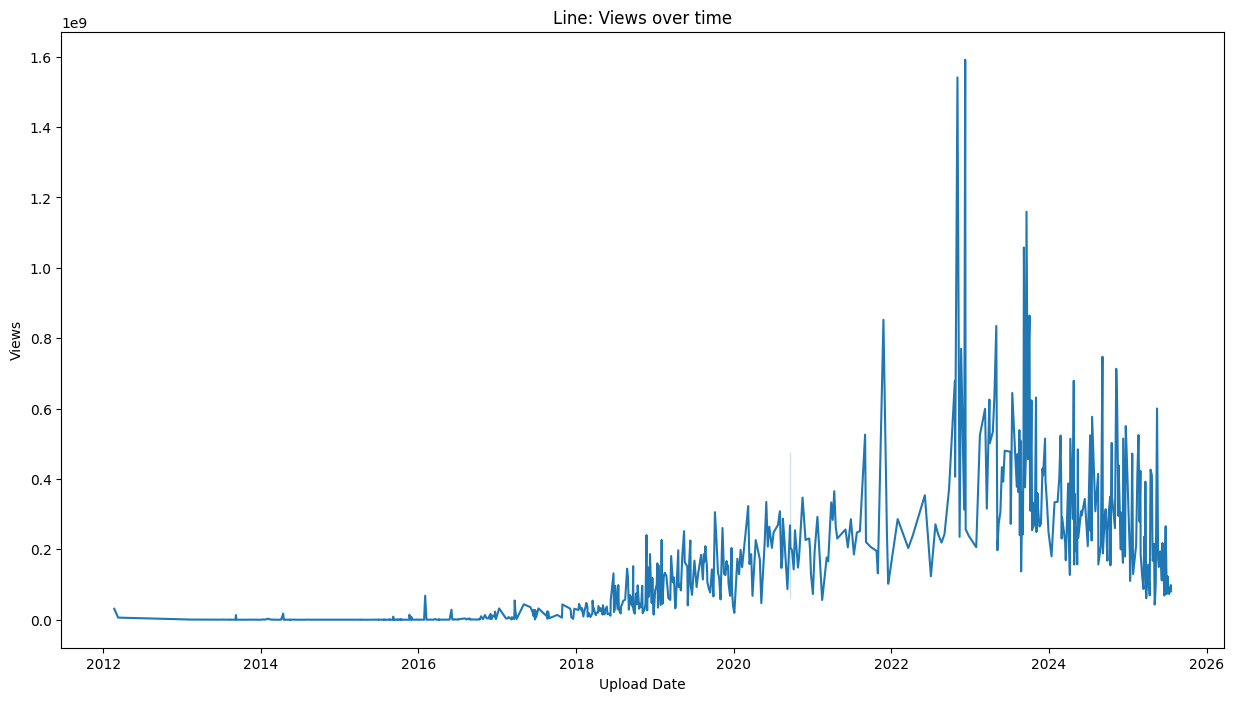

In [52]:
title= 'Line: Views over time'
plt.figure(figsize=(15, 8))
sns.lineplot(x='Upload_Date', y='Views', data=rt)
plt.title(title)
plt.xlabel('Upload Date')
plt.ylabel('Views')
plt.show()

The channel had very few views before 2018. 

From 2021 to 2023, many videos went viral and got a lot of views.
 
In recent times, the views have started to slow down a bit.

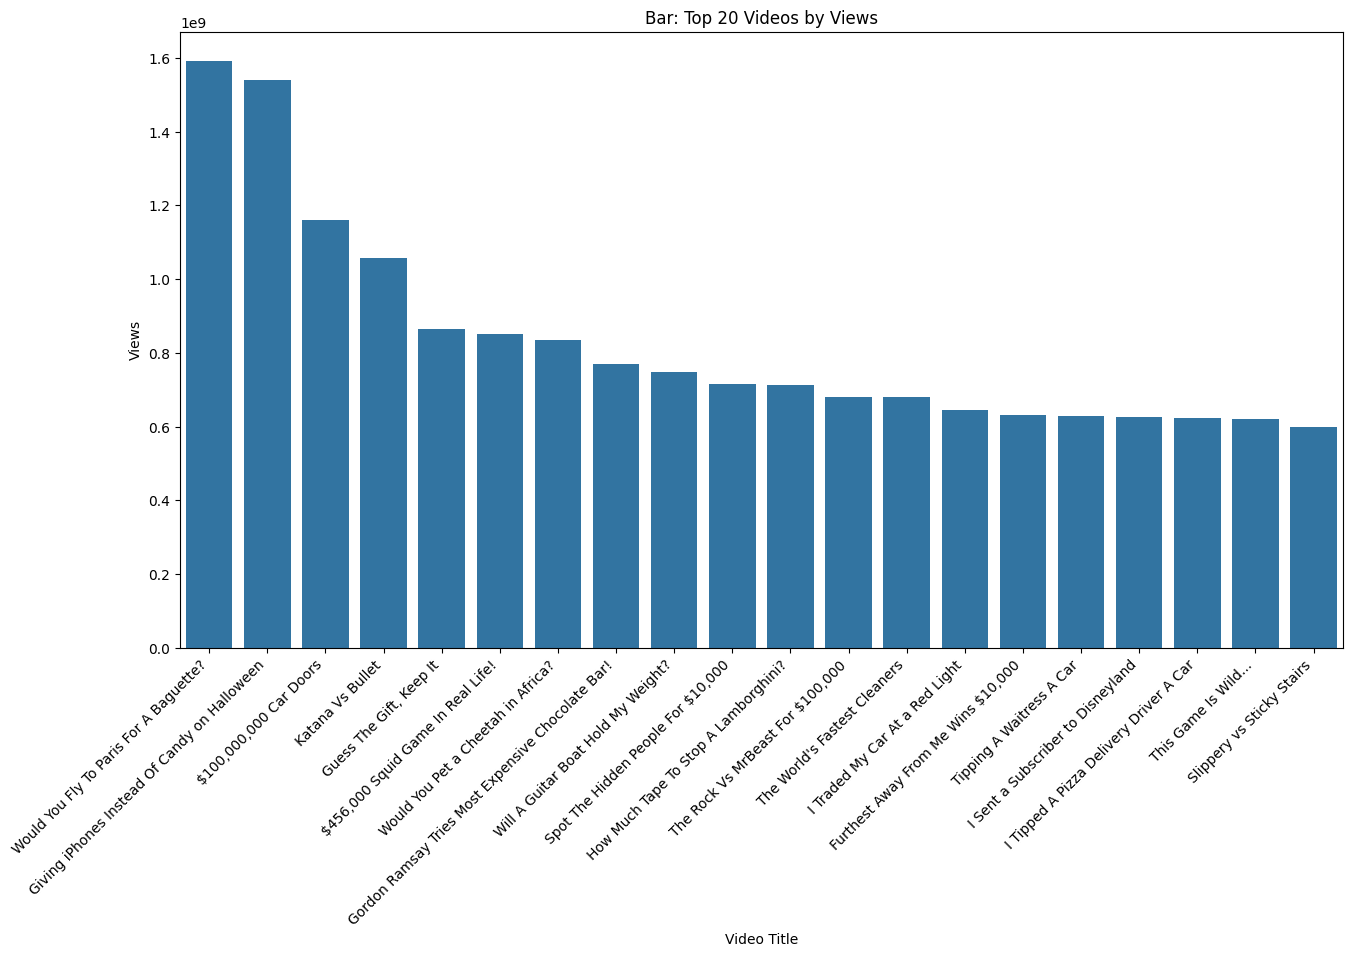

In [53]:
#Bar: Views per video
plt.figure(figsize=(15, 8))
sns.barplot(x='Title', y='Views', data=rt.sort_values(by='Views', ascending=False).head(20))
plt.title('Bar: Top 20 Videos by Views')
plt.xlabel('Video Title')
plt.ylabel('Views')
plt.xticks(rotation=45, ha='right')
plt.show()


The top videos have over 1 billion views, with the most-watched being “Would You Fly To Paris For A Baguette?”.


Means that Creative and surprising challenges clearly attract massive attention.


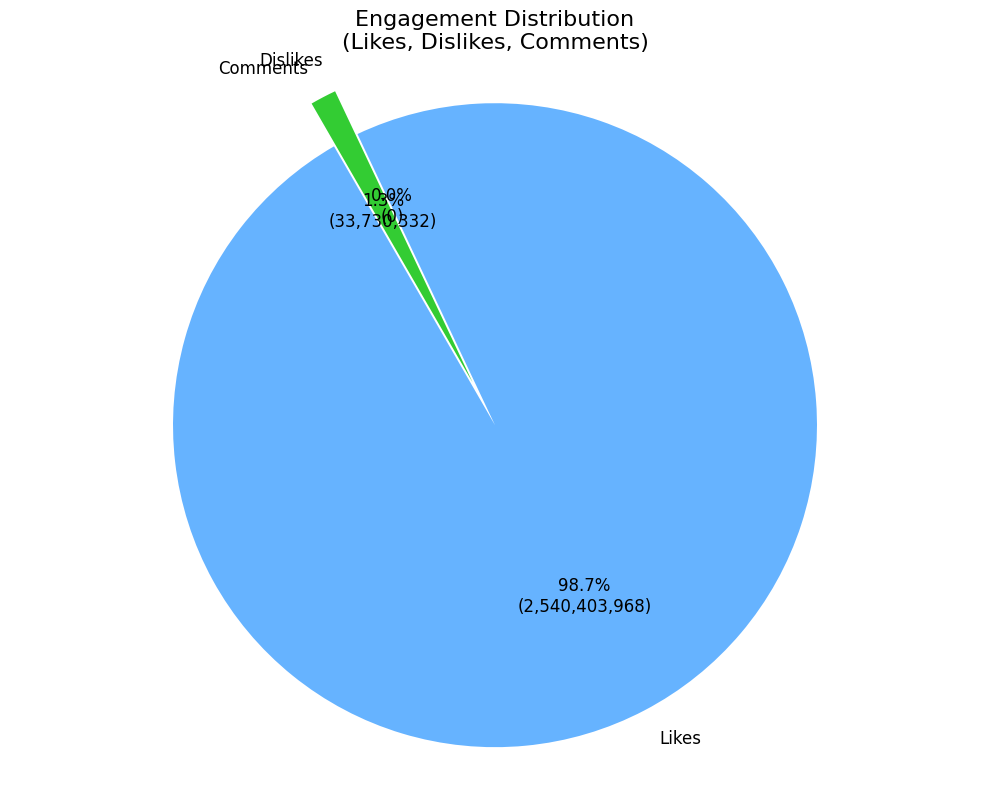

In [51]:
# Engagement totals
engagement_data = rt[['Likes', 'Dislikes', 'Comments']].sum()

# Explode only Dislikes and Comments for visibility
explode = [0, 0.15, 0.15]  # [Likes, Dislikes, Comments]

# Colors for contrast
colors = ['#66b3ff', '#ff4d4d', '#33cc33']  # Blue, Red, Green

# Custom labels with percentage and count
def make_autopct(values):
    def autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count:,})'
    return autopct

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.title('Engagement Distribution\n(Likes, Dislikes, Comments)', fontsize=16)
plt.pie(
    engagement_data,
    labels=engagement_data.index,
    autopct=make_autopct(engagement_data),
    explode=explode,
    colors=colors,
    startangle=120,
    textprops={'fontsize': 12}
)
plt.axis('equal')
plt.tight_layout()
plt.show()


The pie chart shows that Likes make up nearly all the engagement on the channel, while Comments and Dislikes are very minimal. 

Dislikes are almost negligible, and Comments form only a small portion of total interactions.

To group MrBeast’s videos into clusters based on their engagement metrics (like views, likes, comments), 

helping us identify content categories that perform similarly.

In [55]:
features = rt[['Views', 'Likes', 'Comments']]

In [56]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

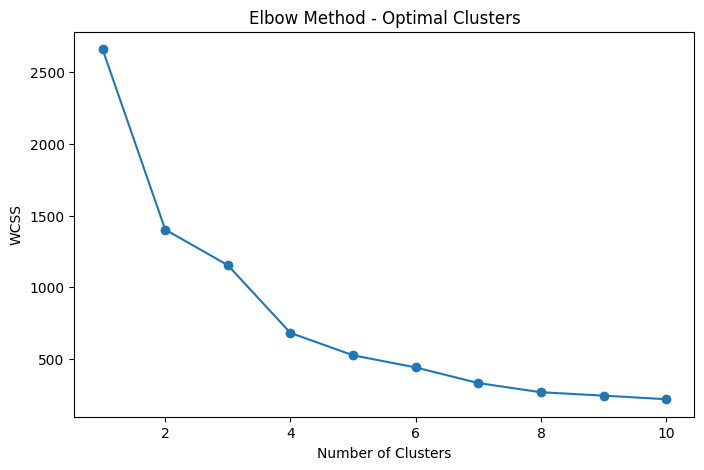

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
rt['Cluster'] = kmeans.fit_predict(scaled_features)

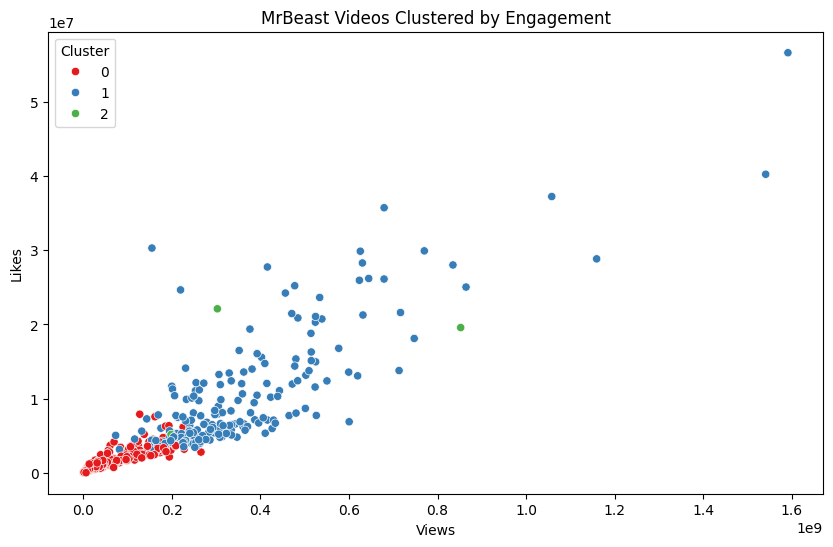

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rt, x='Views', y='Likes', hue='Cluster', palette='Set1')
plt.title('MrBeast Videos Clustered by Engagement')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()


In [61]:
rt.groupby('Cluster')[['Views', 'Likes', 'Comments']].mean()

,Views,Likes,Comments
Cluster,,,
0,2.841571e+07,6.644595e+05,18140.342067
1,3.584034e+08,1.039313e+07,97462.622449
2,4.510243e+08,1.562212e+07,721747.333333


In [64]:
rt.to_csv('../data/youtube_clustered_data.csv', index=False)